In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import geopandas
import pandas
import shapely.geometry

In [2]:
# Load the data sets
mad = geopandas.read_file("City_Limit.zip").to_crs("epsg:32616")
water = geopandas.read_file("Lakes_and_Rivers.zip").to_crs(mad.crs)
fire = geopandas.read_file("Fire_Stations.geojson").to_crs(mad.crs)
print("DONE")

DONE


<Axes: >

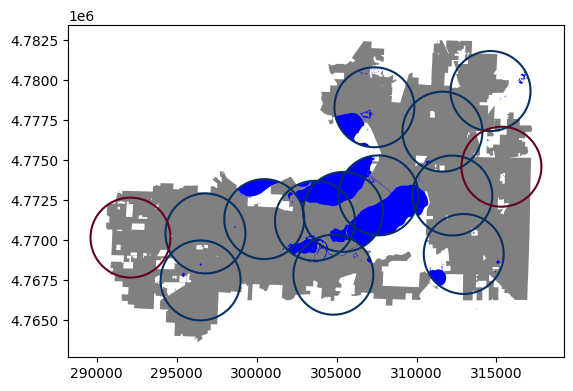

In [3]:
# Plot the lakes and rivers within 2.5 km of the fire stations
fire_buffer = geopandas.GeoDataFrame(geometry = fire.buffer(2500), crs = mad.crs)
fire_boundary = geopandas.GeoDataFrame(geometry = fire_buffer.boundary, crs = mad.crs)
fire_boundary["water"] = fire_buffer.intersects(water.unary_union)
nearby_water = geopandas.overlay(fire_buffer, water, how = 'intersection')
ax = mad.plot(color = "grey")
nearby_water.plot(color = "blue", ax = ax)
fire_boundary.plot("water", cmap = "RdBu", ax = ax)

In [4]:
# Find the area of the water near the fire stations
nearby_water.unary_union.area

24936271.44773557

<Axes: >

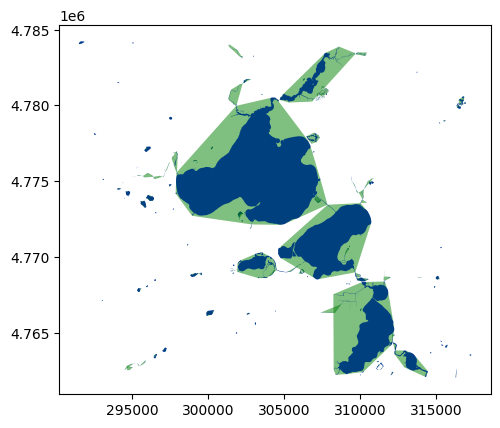

In [5]:
# Find the convex hull of the lakes and rivers
water_hull = geopandas.GeoDataFrame(geometry = water.convex_hull, crs = mad.crs)
ax = water.plot(color = "blue")
water_hull.plot(color = "green", alpha = 0.5, ax = ax)

<Axes: >

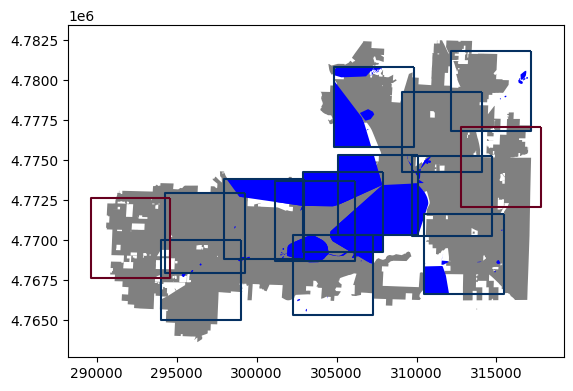

In [6]:
# Find the intersection between the convex hull of the waters and a square around the fire stations
fire_buffer = geopandas.GeoDataFrame(geometry = fire.buffer(2500, cap_style = 3), crs = mad.crs)
fire_boundary = geopandas.GeoDataFrame(geometry = fire_buffer.boundary, crs = mad.crs)
fire_boundary["water"] = fire_buffer.intersects(water_hull.unary_union)
nearby_water = geopandas.overlay(fire_buffer, water_hull, how = 'intersection')
ax = mad.plot(color = "grey")
nearby_water.plot(color = "blue", ax = ax)
fire_boundary.plot("water", cmap = "RdBu", ax = ax)